In [1]:
%matplotlib inline

### Apply MMSplice to the ClinVar variants.

```python
#!/Users/kemalinecik/miniconda3/envs/mrkdwn/bin/python

# Kemal Inecik
# k.inecik@gmail.com

import subprocess
from mmsplice.vcf_dataloader import SplicingVCFDataloader
from mmsplice import MMSplice, predict_save

# Data files
gtf = "data/chr1.gtf"
vcf_ben = "data/clinvar_chr1_benign"
vcf_pat = "data/clinvar_chr1_pathogenic"
fasta = "data/chr1.fa"
output = "mmsplice_output/predictions_"

# Repeat the process for benign and pathogenic variants
for vcf, typ in zip([vcf_ben, vcf_pat], ["benign", "pathogenic"]):
    print(f"\n\n\nRunning MMSPlice for {typ}.\n\n\n")

    # Filtering VCF file
    subprocess.call(f"echo 'Quality filtering has not been applied for {typ}.'", shell=True)
    subprocess.call(f"bcftools norm -m-both -o {vcf + '_temp.vcf'} {vcf + '.vcf.gz'}", shell=True)
    subprocess.call(f"bcftools norm -f {fasta} -o {vcf + '.vcf'} {vcf + '_temp.vcf'}", shell=True)
    vcf = vcf + '.vcf'

    # Run MMSplice
    dl = SplicingVCFDataloader(gtf, fasta, vcf, tissue_specific=False)
    model = MMSplice()
    predict_save(model, dl, f"{output}{typ}.csv", pathogenicity=True, splicing_efficiency=True)
```

### Analysis of the differences in MMSplice predictions between benign and pathogenic ClinVar variants

In [2]:
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
raw_ben = pd.read_csv("mmsplice_output/predictions_benign.csv")
raw_ben.head()

,ID,exons,exon_id,gene_id,gene_name,transcript_id,delta_logit_psi,ref_acceptorIntron,ref_acceptor,ref_exon,ref_donor,ref_donorIntron,alt_acceptorIntron,alt_acceptor,alt_exon,alt_donor,alt_donorIntron,pathogenicity,efficiency
0,1:874778:GCCTCCCCAGCCACGGTGAGGACCCACCCTGGCATGA...,1:874654-874792:+,ENST00000341065.5,ENSG00000187634,ENSG00000187634,ENST00000341065,-8.626808,-4.815811,2.295589,-2.551278,5.476091,-0.039652,-4.815811,2.295589,-2.491574,-4.064222,-0.366048,1.000000,-9.992449
1,1:874778:GCCTCCCCAGCCACGGTGAGGACCCACCCTGGCATGA...,1:874654-874840:+,ENST00000342066.7,ENSG00000187634,ENSG00000187634,ENST00000342066,0.287881,-4.815811,2.295589,-2.736877,5.476091,-0.196461,-4.815811,2.295589,-2.551278,5.476091,-0.196461,0.132712,0.589476
2,1:874778:GCCTCCCCAGCCACGGTGAGGACCCACCCTGGCATGA...,1:874654-874840:+,ENST00000455979.1,ENSG00000187634,ENSG00000187634,ENST00000455979,0.287881,-1.265571,2.441532,-2.736877,5.476091,-0.196461,-1.265571,2.441532,-2.551278,5.476091,-0.196461,0.109623,0.589476
3,1:879481:G>C,1:879077-879639:+,ENST00000455979.7,ENSG00000187634,ENSG00000187634,ENST00000455979,0.053372,-4.116316,8.159917,-3.439501,-2.088679,0.105083,-4.116316,8.159917,-3.405433,-2.088679,0.105083,0.746862,0.008198
4,1:879481:G>C,1:879287-879955:+,ENST00000341065.12,ENSG00000187634,ENSG00000187634,ENST00000341065,0.045006,-4.425405,4.345118,-3.600469,-3.287131,0.105083,-4.425405,4.345118,-3.571806,-3.287131,0.105083,0.924715,-0.012537


In [4]:
raw_pat = pd.read_csv("mmsplice_output/predictions_pathogenic.csv")
raw_pat.head()

,ID,exons,exon_id,gene_id,gene_name,transcript_id,delta_logit_psi,ref_acceptorIntron,ref_acceptor,ref_exon,ref_donor,ref_donorIntron,alt_acceptorIntron,alt_acceptor,alt_exon,alt_donor,alt_donorIntron,pathogenicity,efficiency
0,1:949523:C>T,1:949363-949920:+,ENST00000379389.2,ENSG00000187608,ENSG00000187608,ENST00000379389,-0.068770,-4.074125,3.531886,-2.727509,-2.481291,0.105083,-4.074125,3.531886,-2.772364,-2.481291,0.105083,0.889766,-0.294554
1,1:949696:C>CG,1:949363-949920:+,ENST00000379389.2,ENSG00000187608,ENSG00000187608,ENST00000379389,-0.031726,-4.074125,3.531886,-2.727509,-2.481291,0.105083,-4.074125,3.531886,-2.748428,-2.481291,0.105083,0.890521,-0.202733
2,1:949739:G>T,1:949363-949920:+,ENST00000379389.2,ENSG00000187608,ENSG00000187608,ENST00000379389,-0.075680,-4.074125,3.531886,-2.727509,-2.481291,0.105083,-4.074125,3.531886,-2.776829,-2.481291,0.105083,0.889625,-0.311682
3,1:957605:G>A,1:957580-957842:+,ENST00000379370.2,ENSG00000188157,ENSG00000188157,ENST00000379370,0.159484,-3.623475,3.502044,-2.426510,4.601789,0.298136,-3.623475,3.502044,-2.323876,4.601789,0.298136,0.150444,0.271219
4,1:957693:A>T,1:957580-957842:+,ENST00000379370.2,ENSG00000188157,ENSG00000188157,ENST00000379370,0.002345,-3.623475,3.502044,-2.426510,4.601789,0.298136,-3.623475,3.502044,-2.425414,4.601789,0.298136,0.146305,-0.118283


Added some useful columns and merged the data frames to facilitate analysis.<br/>
Threshold for Δlogit(Ψ) is set to absolute value of 2, as suggested in the paper.

In [5]:
raw_ben["ClinVar Annotation"] = "Benign"
raw_pat["ClinVar Annotation"] = "Pathogenic"

raw_ben["Δlogit(Ψ)"] = ["Below Threshold" if np.abs(i) < 2 else "Above Threshold" for i in raw_ben["delta_logit_psi"]]
raw_pat["Δlogit(Ψ)"] = ["Below Threshold" if np.abs(i) < 2 else "Above Threshold" for i in raw_pat["delta_logit_psi"]]

raw_all = pd.concat([raw_ben, raw_pat])

Have a quick look on the numbers of variants in some cases

In [6]:
# Counts
counts = dict()
counts["Total"] = len(raw_all)
counts["Benign"] = len(raw_ben) 
counts["Pathogenic"] = len(raw_pat) 
counts["Above Thr"] = len(raw_all[raw_all["Δlogit(Ψ)"] == "Above Threshold"]) 
counts["Below Thr"] = len(raw_all[raw_all["Δlogit(Ψ)"] == "Below Threshold"]) 
counts["Benign & Above Thr"] = len(raw_ben[raw_ben["Δlogit(Ψ)"] == "Above Threshold"])
counts["Benign & Below Thr"] = len(raw_ben[raw_ben["Δlogit(Ψ)"] == "Below Threshold"])
counts["Pathogenic & Above Thr"] = len(raw_pat[raw_pat["Δlogit(Ψ)"] == "Above Threshold"])
counts["Pathogenic & Below Thr"] = len(raw_pat[raw_pat["Δlogit(Ψ)"] == "Below Threshold"])
for c in counts: print(f"{c}: {counts[c]}")

Total: 53473
Benign: 30620
Pathogenic: 22853
Above Thr: 2284
Below Thr: 51189
Benign & Above Thr: 112
Benign & Below Thr: 30508
Pathogenic & Above Thr: 2172
Pathogenic & Below Thr: 20681


In [7]:
# If the threshold has no effect on variant type
print(f"\nIf the threshold has no effect on variant type:")
print(f"Above threshold benign variant: {round(counts['Benign'] * (counts['Above Thr'] / counts['Total']))}")
print(f"Below threshold benign variant count {round(counts['Benign'] * (counts['Below Thr'] / counts['Total']))}")
print(f"Above threshold pathogenic variant {round(counts['Pathogenic'] * (counts['Above Thr'] / counts['Total']))}")
print(f"Below threshold pathogenic variant {round(counts['Pathogenic'] * (counts['Below Thr'] / counts['Total']))}")


If the threshold has no effect on variant type:
Above threshold benign variant: 1308
Below threshold benign variant count 29312
Above threshold pathogenic variant 976
Below threshold pathogenic variant 21877


Therefore, above threshold for Δlogit(Ψ), the ratios are very different from random scenario.

### ClinVar variants above and below the threshold for Δlogit(Ψ)

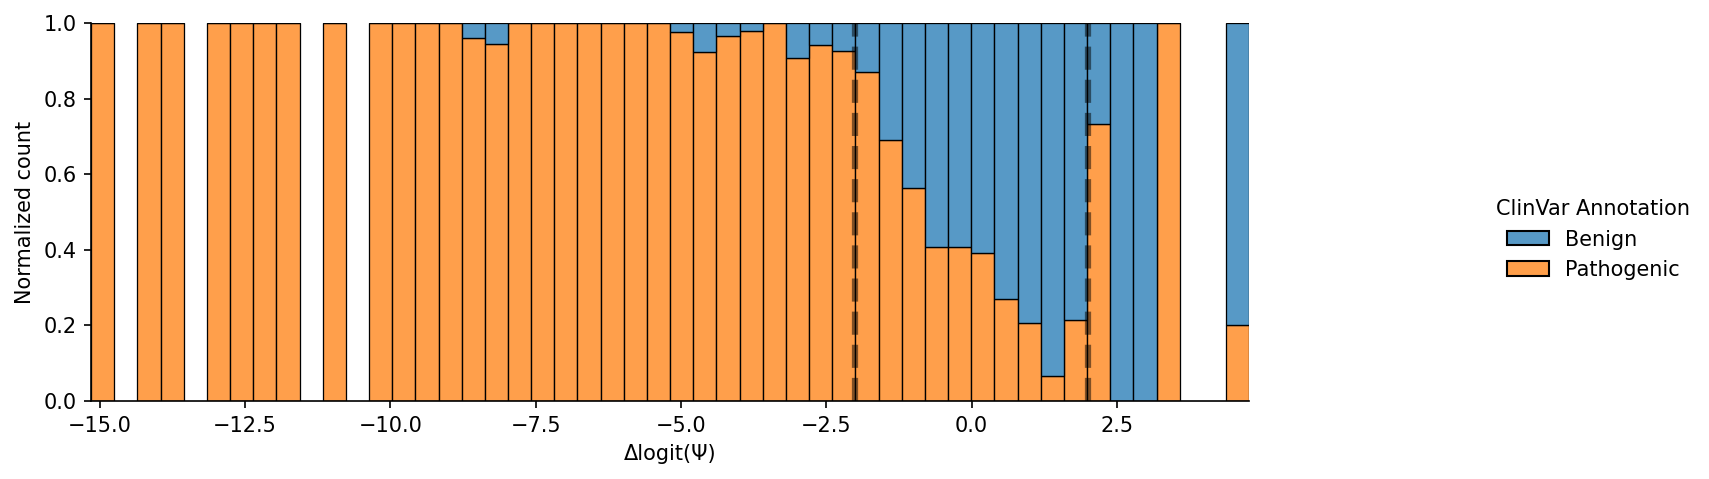

In [8]:
sns.displot(multiple="fill", bins=50,data=raw_all, x="delta_logit_psi", hue="ClinVar Annotation")
plt.axvline(2, ls='--', linewidth=3, color='black', alpha=0.5)
plt.axvline(-2, ls='--', linewidth=3, color='black', alpha=0.5)
plt.xlabel("Δlogit(Ψ)"); plt.ylabel("Normalized count"); sns.despine()
plt.gcf().set_size_inches((12, 3)); plt.gcf().set_dpi(150); plt.show()

* I choose arbitrarily 50 as the number of bins.
* The y-axis is normalized for each bin since the interest is the ratios.
* Horizontal lines are the thresholds, as suggested in the paper.
* It is clear that Δlogit(Ψ)<-2 threshold strongly favours the pathogenic variants, hence it is accurate.
* It is important to note that in Δlogit(Ψ)>2, the model is not good in differentiating the benigns from pathogenics.

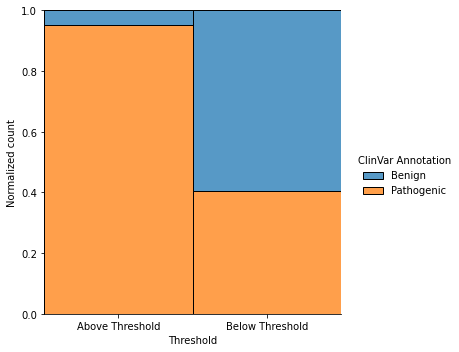

In [9]:
sns.displot(multiple="fill", data=raw_all, x="Δlogit(Ψ)", hue="ClinVar Annotation")
plt.xlabel("Threshold"); plt.ylabel("Normalized count"); sns.despine()
plt.show()

### ClinVar variants compared to the pathogenicity score

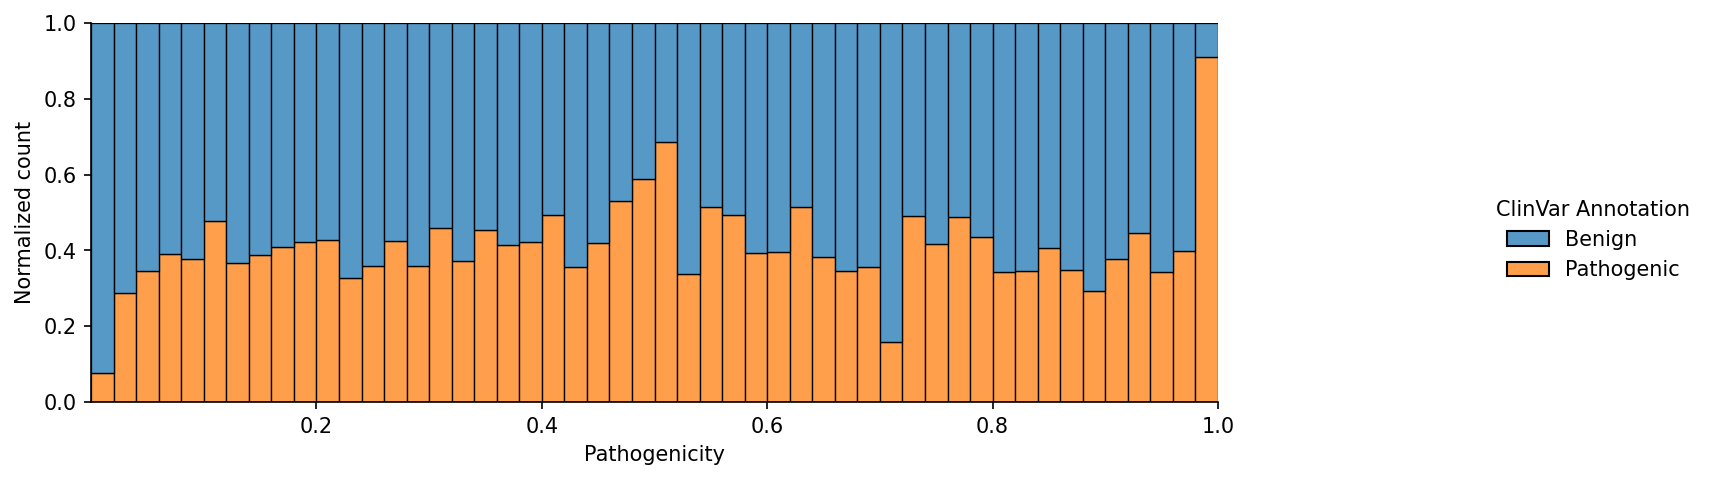

In [10]:
sns.displot(multiple="fill", bins=50, data=raw_all, x="pathogenicity", hue="ClinVar Annotation")
plt.xlabel("Pathogenicity"); plt.ylabel("Normalized count"); sns.despine()
plt.gcf().set_size_inches((12, 3)); plt.gcf().set_dpi(150); plt.show()

* I choose arbitrarily 50 as the number of bins.
* The y-axis is normalized for each bin since the interest is the ratios.

### Relation of pathogenicity and Δlogit(Ψ) with ClinVar variants

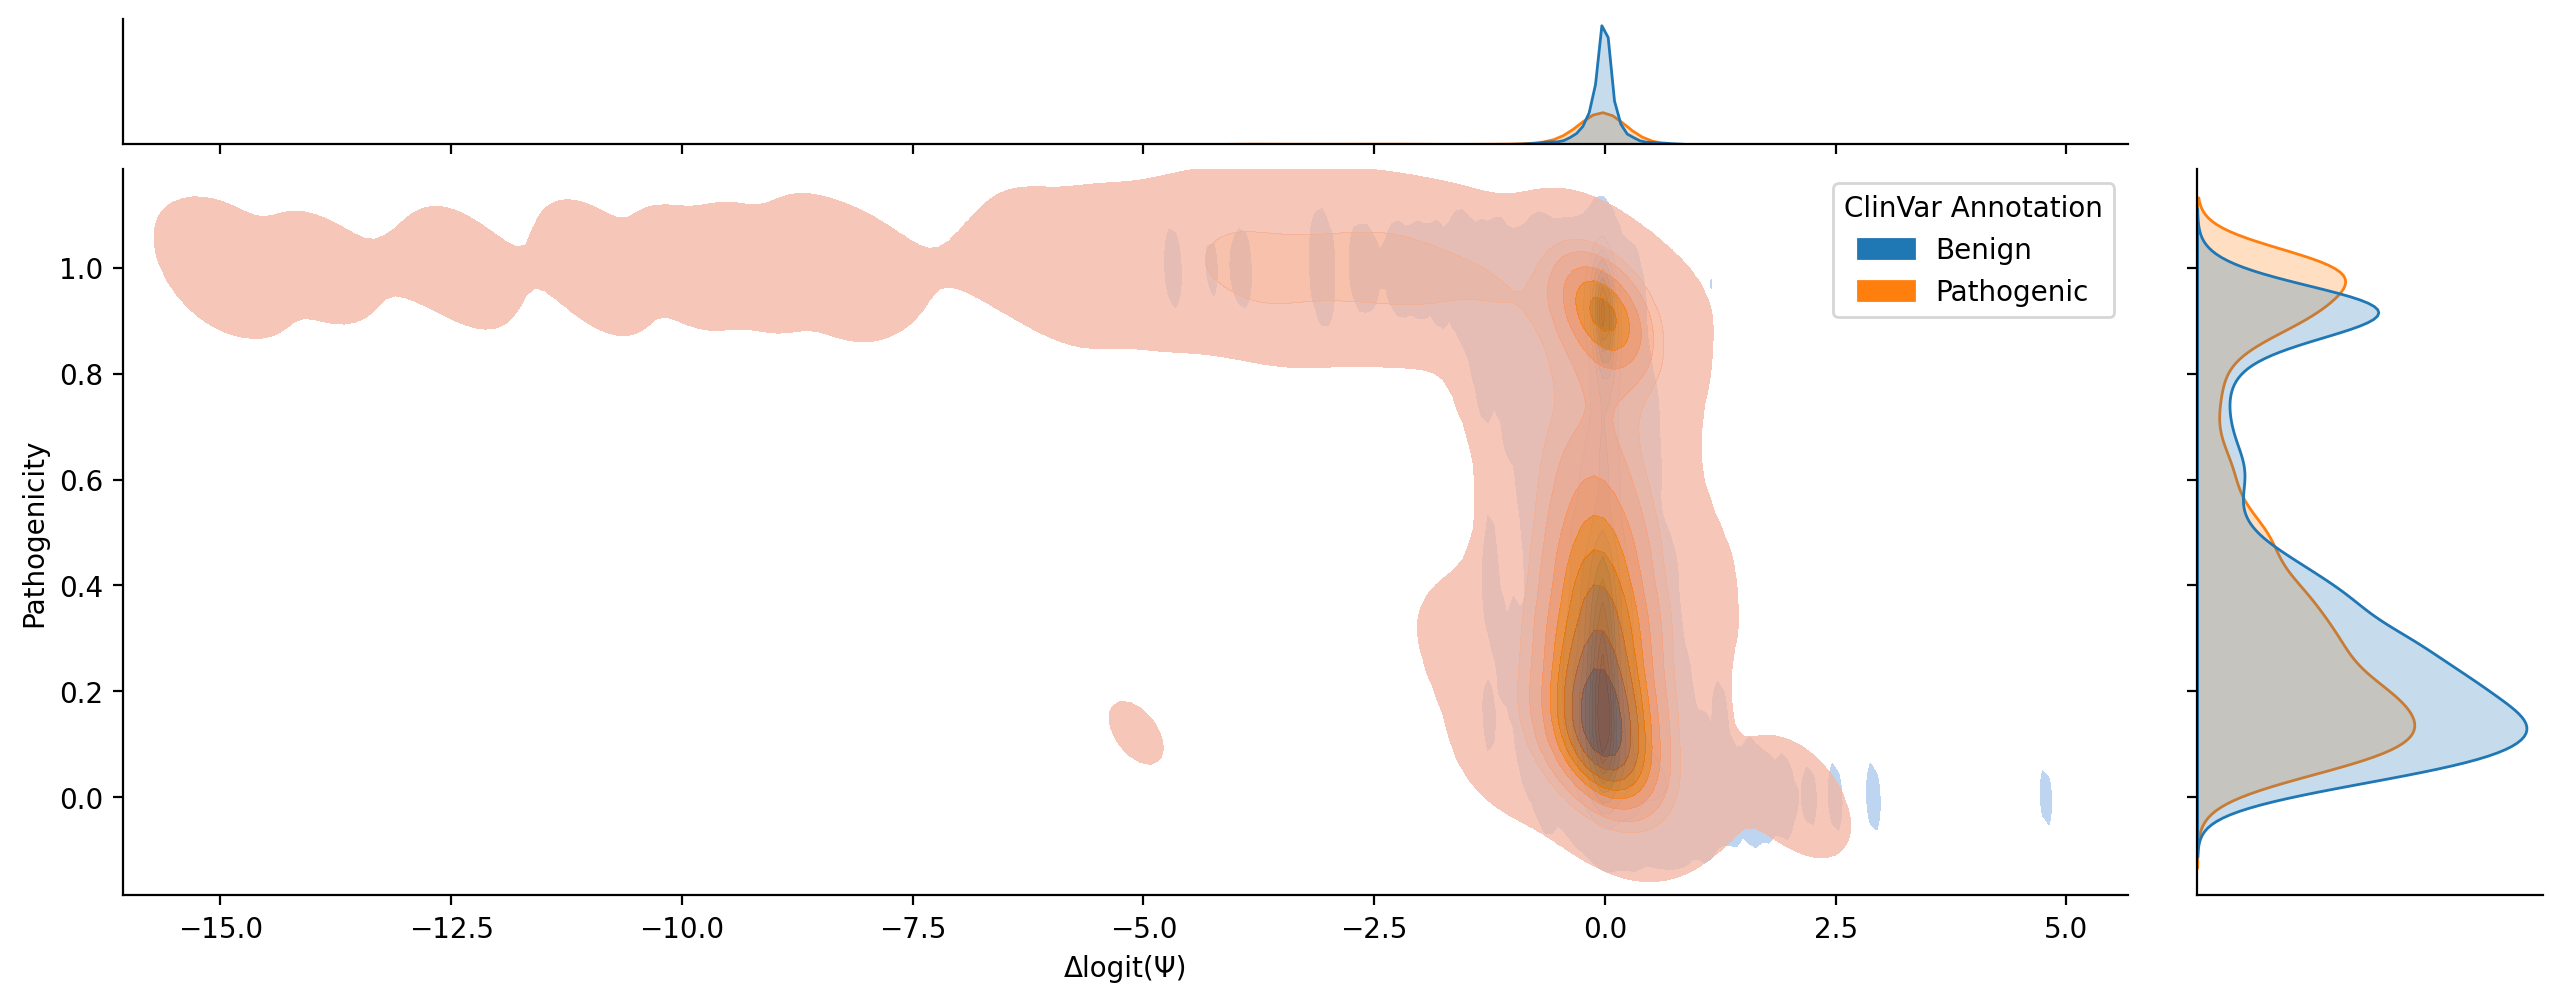

In [11]:
g = sns.jointplot(data=raw_all, hue="ClinVar Annotation", y="pathogenicity", x="delta_logit_psi", hue_order=["Benign", "Pathogenic"],
                 kind="kde", thresh=0.0025, alpha=.75, fill=True, common_norm=False)
g.set_axis_labels('Δlogit(Ψ)', 'Pathogenicity'); sns.despine()
plt.gcf().set_size_inches((14, 5)); plt.gcf().set_dpi(200); plt.show()

* High pathogenicity associated with above threshold Δlogit(Ψ).
* Some of ClinVar Pathogenic variants populates the high pathogenicity above threshold area in the graph.
* Makes sense since not all pathogenic variants are pathogenic due to splicing. 
* We should be interested only in above threshold variants since threshold filters out variants which probably have effect on splicing.

### Analysis of variants with |Δlogit(Ψ)|>2 in terms of ClinVar annotation and pathogenicity score

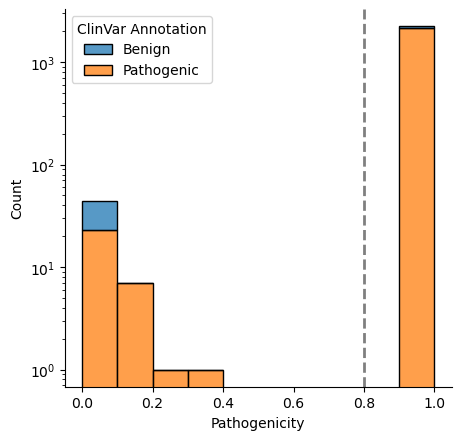

In [12]:
g = sns.histplot(multiple="stack", bins=10, x="pathogenicity", hue="ClinVar Annotation", 
             data=raw_all[raw_all["Δlogit(Ψ)"] == "Above Threshold"], log_scale=(False, True))
plt.xlabel("Pathogenicity"); plt.ylabel("Count"); sns.despine()
plt.axvline(0.8, ls='--', linewidth=2, color='black', alpha=0.5)
plt.gcf().set_size_inches((5, 5)); plt.gcf().set_dpi(100); plt.show()

* Pathogenic ClinVar variants overpopulates above threshold variant pool.
* Some of the pathogenic variants above Δlogit(Ψ) threshold are shown to be 'not-so-pathogenic' (low pathogenicity score).
* 0.8 is accepted arbitrarily as the threshold of 'high pathogenicity score'.

#### Confusion matrix, Precision and Recall

In [13]:
filtered = raw_all[raw_all["Δlogit(Ψ)"] == "Above Threshold"]
positive_results = filtered[filtered["pathogenicity"] > 0.8]
negative_results = filtered[filtered["pathogenicity"] <= 0.8]

conf_mat = dict()
conf_mat["True Positive"] = len(positive_results[positive_results["ClinVar Annotation"] == "Pathogenic"])
conf_mat["False Positive"] = len(positive_results[positive_results["ClinVar Annotation"] == "Benign"])
conf_mat["True Negative"] = len(negative_results[negative_results["ClinVar Annotation"] == "Benign"])
conf_mat["False Negative"] = len(negative_results[negative_results["ClinVar Annotation"] == "Pathogenic"])

stats = dict()
stats["Sensitivity (true positive rate)"] = conf_mat["True Positive"] / (conf_mat["True Positive"] + conf_mat["False Negative"]) # recall
stats["Specificity (true negative rate)"] = conf_mat["True Negative"] / (conf_mat["True Negative"] + conf_mat["False Positive"]) # selectivity
stats["Precision"] = conf_mat["True Positive"] / (conf_mat["True Positive"] + conf_mat["False Positive"]) # positive predictive value
stats["Accuracy"] = (conf_mat["True Positive"] + conf_mat["True Negative"]) / len(filtered)
stats["Balanced Accuracy"] = (stats["Sensitivity (true positive rate)"] + stats["Specificity (true negative rate)"]) / 2

for c in conf_mat: print(f"{c}: {conf_mat[c]}")
print()
for s in stats: print(f"{s}: {round(stats[s], 2)}")

True Positive: 2140
False Positive: 91
True Negative: 21
False Negative: 32

Sensitivity (true positive rate): 0.99
Specificity (true negative rate): 0.19
Precision: 0.96
Accuracy: 0.95
Balanced Accuracy: 0.59


### Analysis of variants with pathogenicity>0.8 in terms of ClinVar annotation and |Δlogit(Ψ)| 

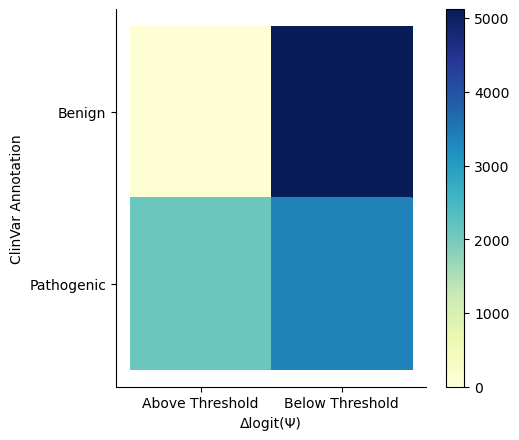

In [14]:
filtered=raw_all[raw_all["pathogenicity"] > 0.8]
g = sns.histplot(x="Δlogit(Ψ)", y="ClinVar Annotation", data=filtered, cbar=True, cmap="YlGnBu")
plt.xlabel("Δlogit(Ψ)"); plt.ylabel("ClinVar Annotation"); sns.despine()
plt.gcf().set_size_inches((5, 5)); plt.gcf().set_dpi(100); plt.show()

In [15]:
d = dict()
d["Benign & Above Thr"] = len(filtered[(filtered["Δlogit(Ψ)"] == "Above Threshold") & (filtered["ClinVar Annotation"] == "Benign")])
d["Benign & Below Thr"] = len(filtered[(filtered["Δlogit(Ψ)"] == "Below Threshold") & (filtered["ClinVar Annotation"] == "Benign")])
d["Pathogenic & Above Thr"] = len(filtered[(filtered["Δlogit(Ψ)"] == "Above Threshold") & (filtered["ClinVar Annotation"] == "Pathogenic")])
d["Pathogenic & Below Thr"] = len(filtered[(filtered["Δlogit(Ψ)"] == "Below Threshold") & (filtered["ClinVar Annotation"] == "Pathogenic")])
for c in d: print(f"{c}: {d[c]}")

Benign & Above Thr: 91
Benign & Below Thr: 5122
Pathogenic & Above Thr: 2140
Pathogenic & Below Thr: 3392


* These numbers are from variants above 0.8 pathogenicity score. Therefore, it is possible to say that pathogenicity score is not enough to classify variants as benign or pathogenic. It should be used together with Δlogit(Ψ) value.
* Variants annotatated as Benign is very low above Δlogit(Ψ) threshold. %98 of bening variants are classified as 'no effect on splicing'. This makes sense considering the catastophic effect of it. 
* Half of pathogenic variants get high pathogenicity score although they are not predicted to be related to splicing.
* Some variants can be pathogenic due to other reasons like causing missense etc.

### Pathogenicity>0.8 and |Δlogit(Ψ)|>2 on  ClinVar annotation

In [16]:
filtered = raw_all[(raw_all["pathogenicity"] > 0.8) & (raw_all["Δlogit(Ψ)"] == "Above Threshold")]
benign = len(filtered[filtered['ClinVar Annotation'] == 'Benign'])
pathogenic = len(filtered[filtered['ClinVar Annotation'] == 'Pathogenic'])

print(f"Benign: {benign}")
print(f"Pathogenic: {pathogenic}")
print(f"Accuracy: {round(pathogenic/len(filtered), 4)}")

Benign: 91
Pathogenic: 2140
Accuracy: 0.9592


* At pathogenicity>0.8 and |Δlogit(Ψ)|>2, 95% of the variants are pathogenic.
* This does not mean it captured most of splicing-error-causing pathogenic variants. ClinVar annotation does not say the reason why they are pathogenic. For this reason, I cannot say about how much of the splicing-error-causing pathogenic variants are not included in this number.